In [286]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

df = pd.read_csv("./salesdata_iphoneya.csv")

# 分析対象機種
brand = "iphone8"

# 比較期間開始日
start_date = "2020-06-01"

# 分析対象機種に絞る
df = df[df["brand"] == brand]
print(brand , len(df), "件")
rest_map = {'◦': "○", '▲':"▲", '×': "×"}


iphone8 269 件


# 分析設計

* 最も取引量が多い iPhone8 でシミュレーション
* シミュレーション期間は2020年6月より2021年3月まで
* 実際の売値とフリマ相場(ヤフオク）との差額を計算し、実際売値と想定売値との差を算出する
* スマホ状態は以下の粒度で集計し相場を算出し突合する
    * 売上月（週）
    * 機種
    * 容量
    * 状態
    * SIMロック
    * ネットワーク利用制限
* 上記情報のうちいずれかが欠落している売上データは今回は分析対象外とする

In [287]:
# 売上日付が入ってない、変な行は消す
print("売上日が入ってない・日付以外のもの")
print("=" * 200)
display(df[pd.to_datetime(df["date_sales"], errors="coerce").isna()])
df = df[~pd.to_datetime(df["date_sales"], errors="coerce").isna()]
df["date_sales"] = pd.to_datetime(df["date_sales"])
df = df[df["date_sales"] >= start_date]
print()

# 容量が入ってないもの
print("容量がNULL")
print("=" * 200)
display(df[df["volume"].isna()])
df = df[~df["volume"].isna()]
df["volume"] = df["volume"].astype(int).astype(str) + "GB"
print(df["volume"].value_counts())
print()

# Simロックが入ってないもの
print("simがNULL")
print("=" * 200)
display(df[df["sim_free_flg"].isna()])
df = df[~df["sim_free_flg"].isna()]
print(df["sim_free_flg"].value_counts())
print()

# 状態が入力されていないもの
print("状態がNULL")
print("=" * 200)
display(df[df["condition"].isna()])
df = df[~df["condition"].isna()]
df["condition"] = df["condition"].astype(int)
print(df["condition"].value_counts())
print()

# ネ利用制限がないもの
print("利用制限がNULL")
print("=" * 200)
display(df[df["restriction"].isna()])
df = df[~df["restriction"].isna()]
df["restriction"] = df["restriction"].map(rest_map)
print(df["restriction"].value_counts())


売上日が入ってない・日付以外のもの


,date_purchase,date_sales,brand,volume,color,carrier_old,carrier,sim_free_flg,restriction,condition_old,condition,IMEI,cost_purchase,cost_repair,cost_shipping,price_sales,cost_yahoo,misc,profit
114,2020/2/5,NaN,iphone8,64.0,H,sb△sf,Softbank,0,▲,新品,5.0,NaN,32500.0,NaN,415.0,35000.0,NaN,255,1830.0
116,2020/2/5,NaN,iphone8,64.0,H,sb△sf,Softbank,0,▲,新品,5.0,NaN,32500.0,NaN,415.0,35000.0,NaN,255,1830.0
384,2019/10/7,大街道,iphone8,64.0,NaN,do sf,docomo,0,NaN,A,4.0,NaN,23000.0,NaN,1000.0,35000.0,NaN,NaN,11000.0
604,2020/6/24,NaN,iphone8,64.0,N,do○sf,docomo,0,◦,AB,3.0,3.57E+14,17800.0,NaN,850.0,22000.0,NaN,NaN,3350.0
709,2020/1/14,NaN,iphone8,64.0,S,au△sf,au,0,▲,NaN,NaN,NaN,19000.0,3300.0,250.0,24280.0,2072.0,NaN,-342.0



容量がNULL


,date_purchase,date_sales,brand,volume,color,carrier_old,carrier,sim_free_flg,restriction,condition_old,condition,IMEI,cost_purchase,cost_repair,cost_shipping,price_sales,cost_yahoo,misc,profit
412,2020/6/30,2020-08-15,iphone8,NaN,NaN,sb○sf,Softbank,0,◦,NaN,NaN,NaN,14000.0,NaN,NaN,17050.0,1194.0,NaN,1857.0
482,2020/7/10,2020-07-22,iphone8,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,14000.0,NaN,490.0,15400.0,1078.0,NaN,-168.0
711,2020/12/22,2021-01-13,iphone8,NaN,N,sb○,Softbank,0,◦,画面割れ,1.0,3.57E+14,7000.0,NaN,980.0,8800.0,616.0,NaN,204.0
776,2020/7/10,2020-07-19,iphone8,NaN,NaN,NaN,NaN,0,NaN,背面割れ,1.0,NaN,8000.0,NaN,490.0,11655.0,816.0,NaN,2349.0
881,2020/8/27,2020-08-15,iphone8,NaN,H,NaN,NaN,0,NaN,J,0.0,NaN,4000.0,NaN,940.0,12320.0,862.0,NaN,6518.0


64GB     135
256GB     13
Name: volume, dtype: int64

simがNULL


,date_purchase,date_sales,brand,volume,color,carrier_old,carrier,sim_free_flg,restriction,condition_old,condition,IMEI,cost_purchase,cost_repair,cost_shipping,price_sales,cost_yahoo,misc,profit


0    147
1      1
Name: sim_free_flg, dtype: int64

状態がNULL


,date_purchase,date_sales,brand,volume,color,carrier_old,carrier,sim_free_flg,restriction,condition_old,condition,IMEI,cost_purchase,cost_repair,cost_shipping,price_sales,cost_yahoo,misc,profit
25,2020/11/9,2021-03-26,iphone8,64GB,S,au○,au,0,◦,NaN,NaN,3.53E+14,16500.0,NaN,NaN,19250.0,1348.0,NaN,1403.0
69,2020/11/26,2021-01-02,iphone8,64GB,N,mineo,mineo,0,NaN,NaN,NaN,3.57E+14,15000.0,NaN,770.0,20320.0,1386.0,NaN,3164.0
102,2020/12/24,2021-01-08,iphone8,64GB,N,au△,au,0,▲,NaN,NaN,3.53E+14,13500.0,NaN,1000.0,19800.0,1386.0,NaN,3914.0
123,2020/11/9,2021-01-17,iphone8,64GB,S,au○,au,0,◦,NaN,NaN,3.53E+14,16500.0,NaN,NaN,19800.0,1386.0,NaN,1914.0
133,2021/1/4,2021-01-23,iphone8,64GB,S,au○,au,0,◦,NaN,NaN,3.57E+14,6000.0,1000.0,620.0,19800.0,1386.0,NaN,10794.0
145,2020/12/17,2020-12-19,iphone8,64GB,N,au,au,0,NaN,NaN,NaN,3.53E+14,14200.0,NaN,1050.0,21420.0,1463.0,NaN,4707.0
200,2020/12/16,2020-12-24,iphone8,64GB,S,app,Apple,0,NaN,NaN,NaN,3.57E+14,12000.0,NaN,1000.0,16388.0,1147.0,NaN,2241.0
205,2020/11/9,2020-12-26,iphone8,64GB,S,au○,au,0,◦,NaN,NaN,3.53E+14,16500.0,NaN,1000.0,18150.0,1271.0,NaN,-621.0
212,2020/11/9,2020-12-27,iphone8,64GB,S,au○,au,0,◦,NaN,NaN,3.53E+14,16500.0,NaN,NaN,15565.0,1090.0,NaN,-2025.0
230,2020/11/9,2020-11-20,iphone8,256GB,H,NaN,NaN,0,NaN,NaN,NaN,3.53E+14,19500.0,900.0,1090.0,19220.0,1309.0,NaN,-3579.0


4    64
3    28
1    24
5    10
0     4
2     3
Name: condition, dtype: int64

利用制限がNULL


,date_purchase,date_sales,brand,volume,color,carrier_old,carrier,sim_free_flg,restriction,condition_old,condition,IMEI,cost_purchase,cost_repair,cost_shipping,price_sales,cost_yahoo,misc,profit
39,2021/1/4,2021-01-08,iphone8,64GB,H,NaN,NaN,0,NaN,新品,5,3.56E+14,27000.0,NaN,250.0,31000.0,NaN,NaN,3750.0
41,2021/1/4,2021-01-08,iphone8,64GB,N,NaN,NaN,0,NaN,新品,5,3.56E+14,27000.0,NaN,250.0,31000.0,NaN,NaN,3750.0
42,2021/1/4,2021-01-08,iphone8,64GB,N,NaN,NaN,0,NaN,新品,5,NaN,27000.0,NaN,250.0,31000.0,NaN,NaN,3750.0
43,2021/1/4,2021-01-08,iphone8,64GB,S,NaN,NaN,0,NaN,新品,5,NaN,27000.0,NaN,250.0,31000.0,NaN,NaN,3750.0
56,2020/8/17,2020-08-21,iphone8,64GB,S,sb,Softbank,0,NaN,未使用品,5,3.56E+14,30000.0,NaN,850.0,41220.0,2849.0,NaN,7521.0
141,2021/3/10,2021-03-18,iphone8,64GB,S,sb〇,Softbank,0,NaN,A,4,3.57E+14,14000.0,NaN,1000.0,20350.0,1425.0,NaN,3926.0
290,2020/6/1,2020-06-10,iphone8,64GB,S,NaN,NaN,0,NaN,A,4,3.57E+14,17000.0,NaN,1050.0,22000.0,1540.0,NaN,2410.0
420,2020/6/16,2020-06-21,iphone8,64GB,N,sf,NaN,1,NaN,B,3,3.56E+14,16000.0,NaN,1160.0,25820.0,1807.0,NaN,6853.0
423,2021/2/15,2021-03-08,iphone8,64GB,H,sb〇,Softbank,0,NaN,B,3,3.56E+14,13500.0,NaN,1150.0,18700.0,1309.0,NaN,2741.0
427,2021/2/3,2021-02-27,iphone8,64GB,H,do〇,docomo,0,NaN,B,3,3.57E+14,13000.0,NaN,350.0,17500.0,1225.0,NaN,2925.0


○    90
▲    22
×     2
Name: restriction, dtype: int64


In [288]:
# とりあえずSimは全てTrueにする
df["sim_free_flg"] = True
print("クレンジング後", len(df), "件")

クレンジング後 114 件


In [289]:
# 分析対象項目に絞る
cols = ["date_sales", "brand", "volume", "condition", "sim_free_flg", "restriction", "price_sales"]
df = df[cols]

# 週番号・月番号を付与
df["sales_week_number"] = df['date_sales'].dt.week
df["sales_month_number"] = df["date_sales"].dt.month
df = df.sort_values(by="date_sales")

# 相場データの取得・加工

In [290]:
# Bigquery から成約済全データ取得
# sql = "select * from aws_mysql_tables.t_fleamarket_sales_sold"
# project_id = "teak-hearth-316213"
# flema = pd.read_gbq(sql, project_id=project_id)

flema = pd.read_pickle("./flema.pkl")

# 週で集計するか月で集計するか
agg_period = "month"
# agg_period = "week"


In [291]:
# 機種の絞り込みと期間の絞り込み
flema = flema[flema["brand"] == brand]
flema = flema[flema["sales_date"] >= start_date]

# 週番号と月番号を付与
flema["sales_week_number"] = flema["sales_date"].dt.week
flema["sales_month_number"] = flema["sales_date"].dt.month

In [292]:
group_keys = [f"sales_{agg_period}_number", "data_type", "brand", "volume", "item_condition", "sim_free_flg", "restriction"]

# 集計期間内の中央値を採用
flema = flema.groupby(group_keys).median().reset_index()

# flema = pd.pivot_table(flema, index=["sales_week_number", "brand", "volume", "item_condition", "sim_free_flg", "restriction"], columns="data_type")["price"].reset_index()
flema = pd.pivot_table(flema, index=[f"sales_{agg_period}_number", "brand", "volume", "item_condition", "sim_free_flg", "restriction"], columns="data_type")["price"].reset_index()

flema = flema.rename(columns={"item_condition": "condition"})
display(flema)

data_type,sales_month_number,brand,volume,condition,sim_free_flg,restriction,B,M,R,Y
0,1,iphone8,128GB,2,True,○,NaN,26000.0,NaN,NaN
1,1,iphone8,128GB,3,True,○,NaN,25000.0,NaN,28000.0
2,1,iphone8,256GB,0,False,○,NaN,16250.0,NaN,12027.5
3,1,iphone8,256GB,0,True,▲,NaN,NaN,NaN,13550.0
4,1,iphone8,256GB,0,True,○,NaN,14250.0,NaN,15200.0
...,...,...,...,...,...,...,...,...,...,...
568,12,iphone8,64GB,4,True,○,30050.0,23750.0,22000.0,27250.0
569,12,iphone8,64GB,5,False,○,NaN,31000.0,NaN,NaN
570,12,iphone8,64GB,5,True,×,NaN,35000.0,NaN,NaN
571,12,iphone8,64GB,5,True,▲,NaN,NaN,NaN,25854.0


In [293]:
result = pd.merge(df, flema, on=[f"sales_{agg_period}_number", "brand", "volume", "condition", "sim_free_flg", "restriction"])

print("count", len(result))

count 113


In [294]:
# ヤフオク相場からの差分
result["simuration_profit"] = result["Y"] - result["price_sales"]
print("シミュレーション結果：", result["simuration_profit"].sum(), "円")

シミュレーション結果： 423631.5 円


In [295]:
import datetime
date = datetime.datetime.now().strftime("%Y%m%d")
result.to_excel(f"{date}_simuration_{brand}_{agg_period}.xlsx", index=None, encoding="utf-8")

# 可視化

## 商品状態別の分析

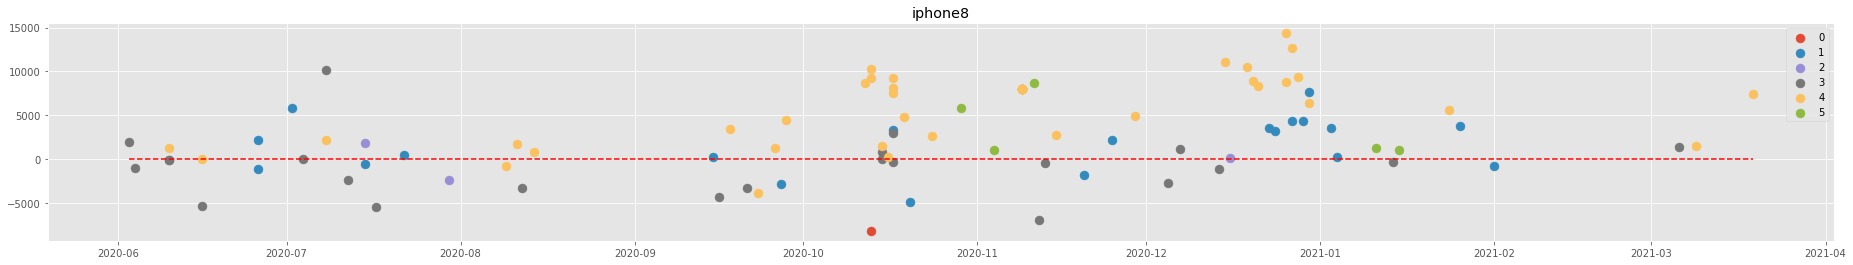

In [296]:
plt.figure(figsize=(32,4))

conditions = result["condition"].unique()
conditions.sort()

for condition in conditions:
    x  = result[result["condition"] == condition]["date_sales"]
    y  = result[result["condition"] == condition]["simuration_profit"]
    plt.scatter(x, y, alpha=1, label=condition, s=80)
plt.hlines(y=0, xmin=min(result["date_sales"]), xmax=max(result["date_sales"]), linestyle="--", color="r")
plt.legend()
plt.title(brand)
plt.show()

## 考察
グラフの見方・・・0円以上は売値より相場が高かった（もっと利益出せた可能性）、0円以下は相場以上の価格（がんばった）で売れたことを指す

* 商品状態 「4：未使用に近い 」 は利益をもっと伸ばせるか  
    → **値段をもっと高目に設定しても取引成立の可能性はある。仕入れ値を高くして販売台数増やすのも良いかも**
* 商品状態 「3：目立った傷なし」は相場より高く売れている  
    → **多少の修理原価をのせてでもランク４にして売った方が利益でる？**

## 容量別の粗利分析

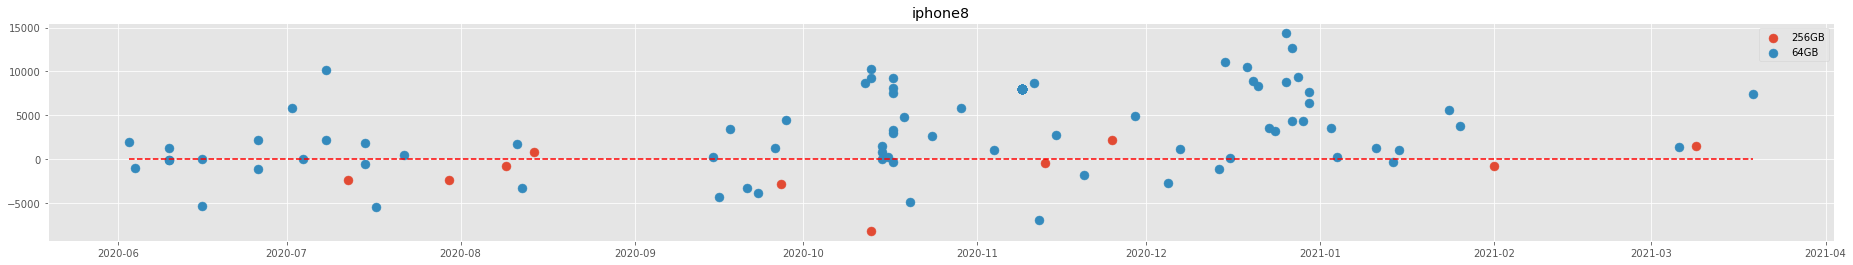

In [297]:
plt.figure(figsize=(32,4))

conditions = result["volume"].unique()
conditions.sort()

for condition in conditions:
    x  = result[result["volume"] == condition]["date_sales"]
    y  = result[result["volume"] == condition]["simuration_profit"]
    plt.scatter(x, y, alpha=1, label=condition, s=80)
plt.hlines(y=0, xmin=min(result["date_sales"]), xmax=max(result["date_sales"]), linestyle="--", color="r")
plt.legend()
plt.title(brand)
plt.show()
